# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline 


In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [17]:
#data.info()
bc1=data.groupby('ItemType')['RetailSales','RetailTransfers','WarehouseSales'].sum()
bc1

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


In [26]:
bc1.RetailSales

ItemType
BEER            209763.11
DUNNAGE              0.00
KEGS                 0.00
LIQUOR          309847.85
NON-ALCOHOL       8109.97
REF                281.34
STR_SUPPLIES       995.98
WINE            313400.42
Name: RetailSales, dtype: float64

(-226655.0, 2681379.051999993)

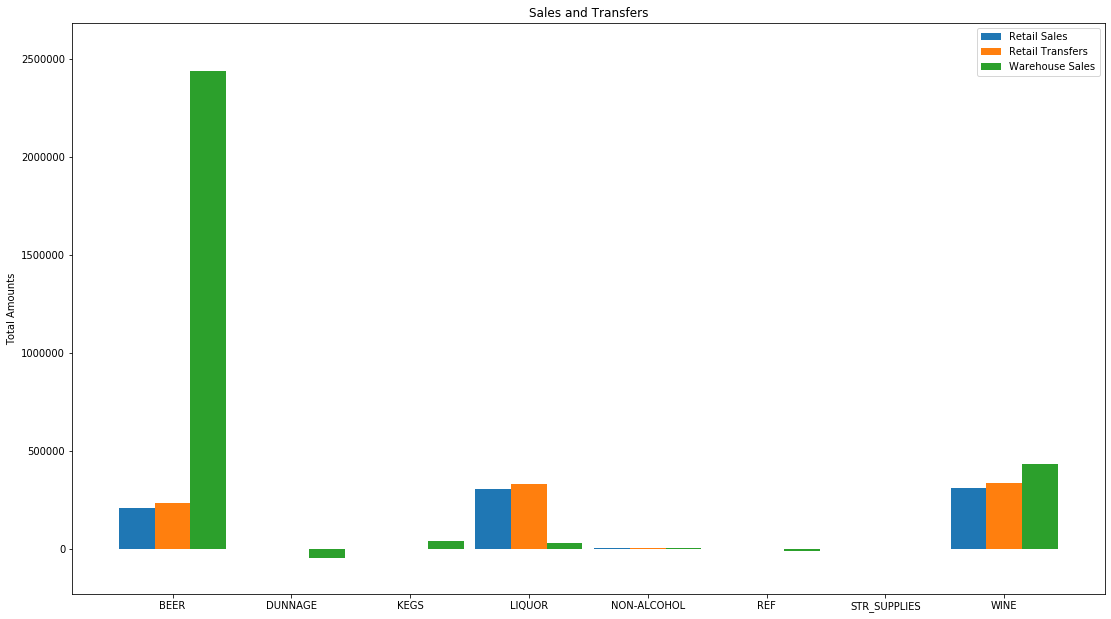

In [56]:
from matplotlib.pyplot import figure

labels = bc1.index
rs = bc1.RetailSales
rt = bc1.RetailTransfers
ws = bc1.WarehouseSales

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots()

bar1 = ax.bar(x - width, rs, width, label='Retail Sales')
bar2 = ax.bar(x , rt, width, label='Retail Transfers')
bar3 = ax.bar(x + width, ws, width, label='Warehouse Sales')

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Total Amounts')
ax.set_title('Sales and Transfers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
ymin=np.min([rs.min(),rt.min(),ws.min()])
ymax=np.max([rs.max(),rt.max(),ws.max()])
axes.set_ylim(ymin*5,ymax*1.1)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [62]:
top10sup=data.groupby('Supplier').RetailSales.sum().sort_values(ascending=False)[:10]

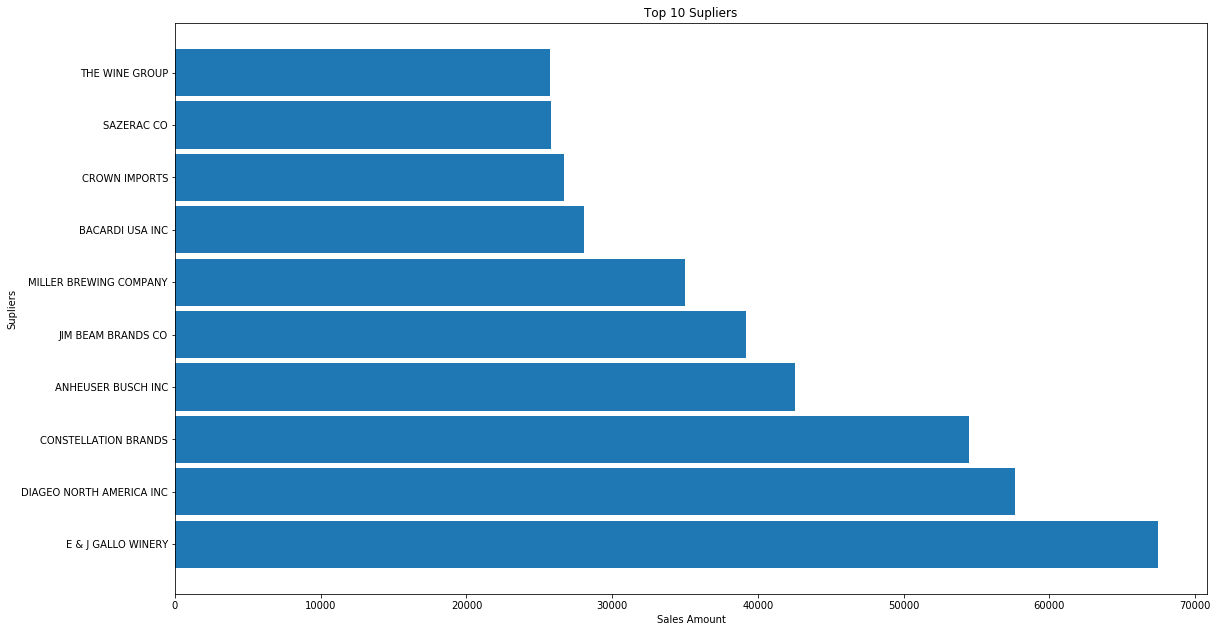

In [87]:
labels = top10sup.index
sup = top10sup

y = np.arange(len(labels))
width = 0.9  

fig, ax = plt.subplots()
bar1 = ax.barh(y, sup, width, label='Suppliers')

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Supliers')
ax.set_xlabel('Sales Amount')
ax.set_title('Top 10 Supliers')

ax.set_yticks(y)
ax.set_yticklabels(labels);

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time

In [93]:
YM=data.groupby(['Year','Month'])['RetailSales','RetailTransfers','WarehouseSales'].sum()
YM.index[0][0]

2017

(0.0, 420405.35900000035)

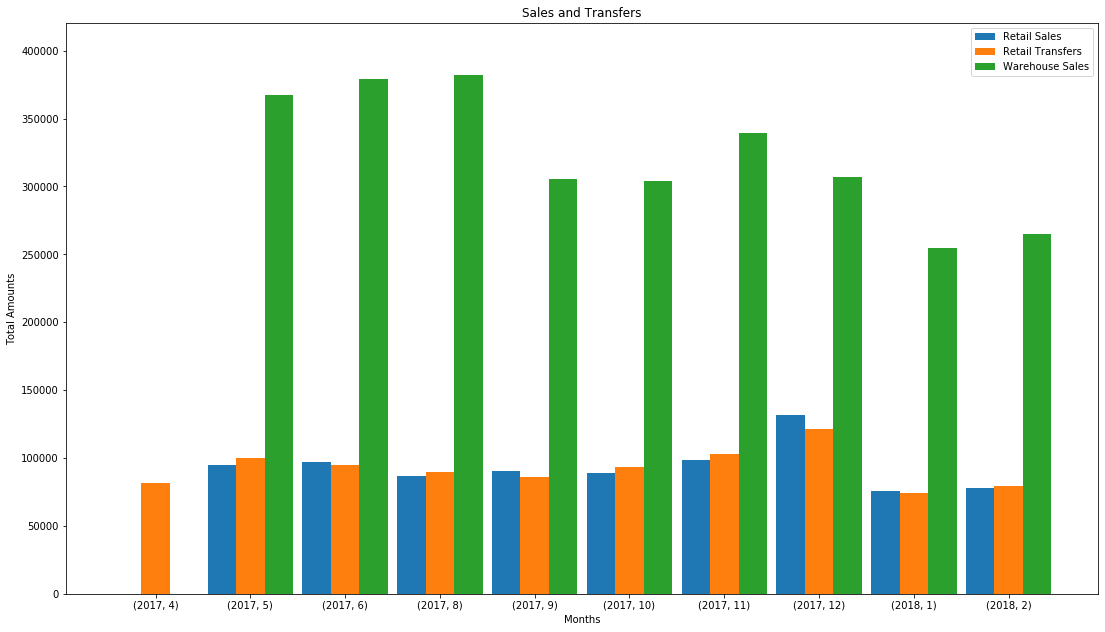

In [95]:
labels = YM.index
rs = YM.RetailSales
rt = YM.RetailTransfers
ws = YM.WarehouseSales

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots()
bar1 = ax.bar(x - width, rs, width, label='Retail Sales')
bar2 = ax.bar(x , rt, width, label='Retail Transfers')
bar3 = ax.bar(x + width, ws, width, label='Warehouse Sales')

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Total Amounts')
ax.set_xlabel('Months')
ax.set_title('Sales and Transfers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Rangos de la grafica
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
ymin=np.min([rs.min(),rt.min(),ws.min()])
ymax=np.max([rs.max(),rt.max(),ws.max()])
axes.set_ylim(ymin*5,ymax*1.1)

## 4. Plot the same information as above but as a bar chart.

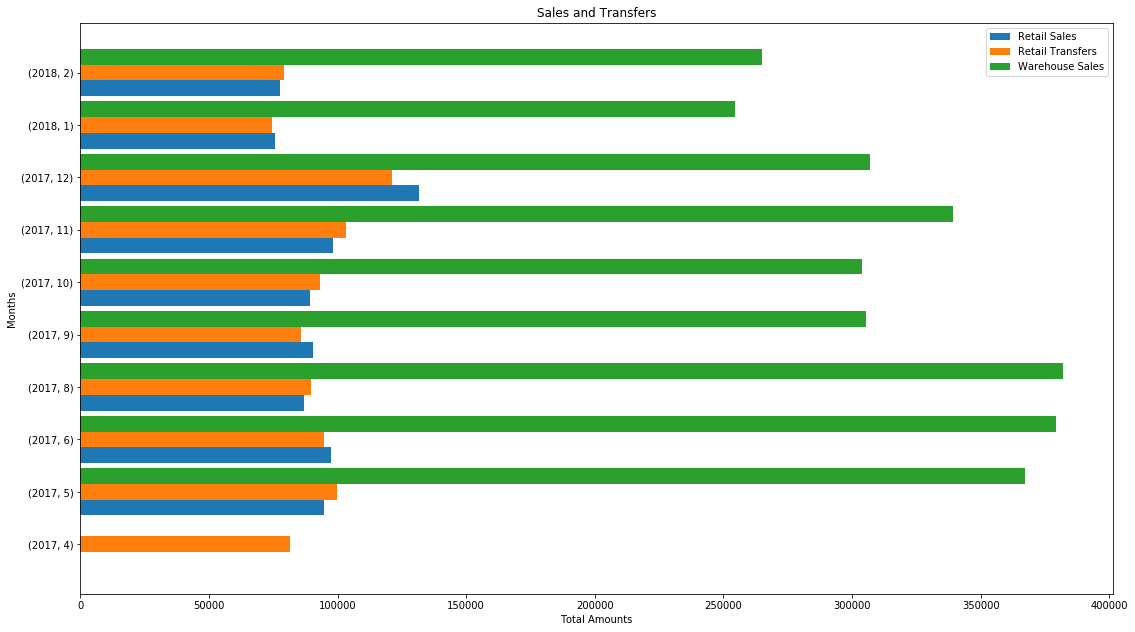

In [100]:
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
bar1 = ax.barh(x - width, rs, width, label='Retail Sales')
bar2 = ax.barh(x , rt, width, label='Retail Transfers')
bar3 = ax.barh(x + width, ws, width, label='Warehouse Sales')

fig.set_size_inches(18.5, 10.5)
ax.set_ylabel('Months')
ax.set_xlabel('Total Amounts')
ax.set_title('Sales and Transfers')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

axes = plt.gca()
#axes.set_xlim([xmin,xmax])

ax.set_yticks(y)
ax.set_yticklabels(labels);

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

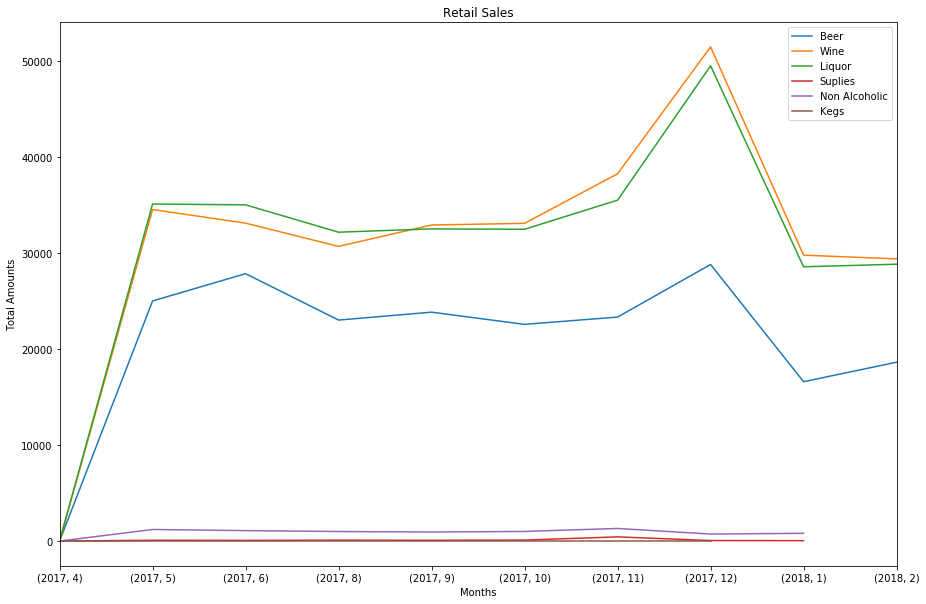

In [317]:
ITRS = data.groupby(['ItemType','Year','Month']).RetailSales.sum()
labels = list(data.ItemType.unique())
x = np.arange(len(labels))  
labels = [i for i in tipos if str(i) != 'nan']
fig, ax = plt.subplots()

beer = ITRS.BEER
wine = ITRS.WINE
liqu = ITRS.LIQUOR
str_ = ITRS.STR_SUPPLIES
nona = ITRS['NON-ALCOHOL']
kegs = ITRS.KEGS

beer.plot(label ='Beer')
wine.plot(label = 'Wine')
liqu.plot(label = 'Liquor')
str_.plot(label = 'Suplies')
nona.plot(label = 'Non Alcoholic')
kegs.plot(label = 'Kegs')

fig.set_size_inches(15, 10)

ax.set_ylabel('Total Amounts')
ax.set_xlabel('Months')
ax.set_title('Retail Sales')

#Nombre de los mes-año del eje x
ym=data.groupby(['Year','Month']).RetailSales.count()
ym=ym.index
ax.set_xticklabels(ym)

ax.legend(loc='best')

## 6. Plot the same information as above but as a bar chart.

In [517]:
db_temp=data.groupby(['ItemType','Year','Month']).sum()
db_temp.reset_index(inplace = True)
db_temp.Year=db_temp.Year.apply(str)
db_temp.Month=db_temp.Month.apply(str)
db_temp['Date']=db_temp.Year+'-'+db_temp.Month

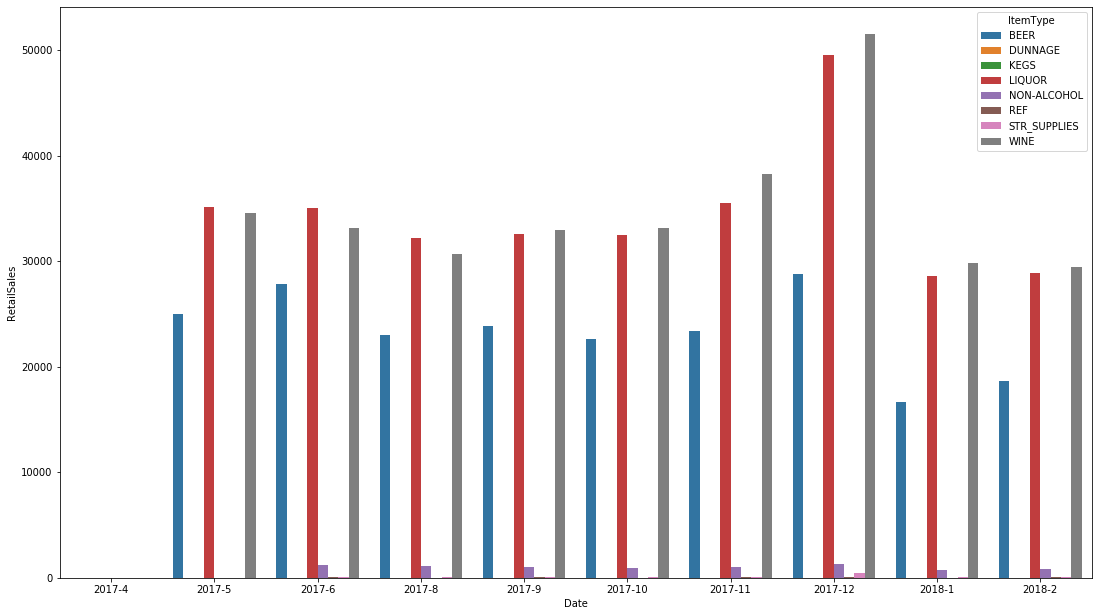

In [519]:
fig, ax = plt.subplots()
sns.barplot(x="Date",y="RetailSales",data=db_temp, hue='ItemType')
fig.set_size_inches(18.5, 10.5)


## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

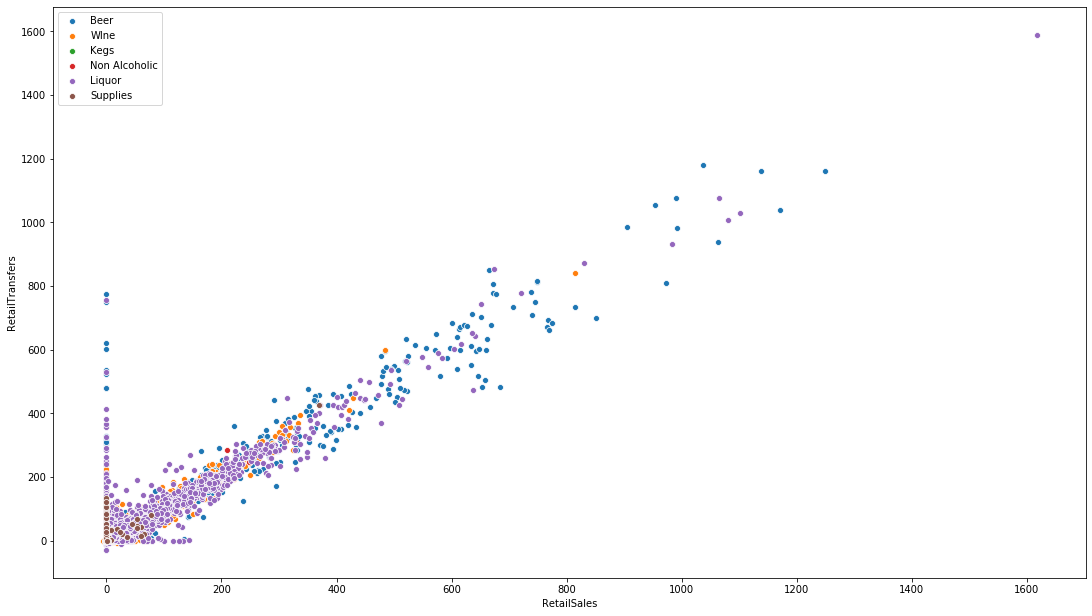

In [298]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

BeerX = data[data.ItemType =='BEER'].RetailSales
BeerY = data[data.ItemType =='BEER'].RetailTransfers
Beer=[BeerX,BeerY]
sns.scatterplot(BeerX,BeerY)
WineX = data[data.ItemType =='WINE'].RetailSales
WineY = data[data.ItemType =='WINE'].RetailTransfers
sns.scatterplot(WineX,WineY)
KegsX = data[data.ItemType =='KEGS'].RetailSales
KegsY = data[data.ItemType =='KEGS'].RetailTransfers
sns.scatterplot(KegsX,KegsY)
NoAX = data[data.ItemType =='NON-ALCOHOL'].RetailSales
NoAY = data[data.ItemType =='NON-ALCOHOL'].RetailTransfers
sns.scatterplot(NoAX,NoAY)
LiqX = data[data.ItemType =='LIQUOR'].RetailSales
LiqY = data[data.ItemType =='LIQUOR'].RetailTransfers
sns.scatterplot(LiqX,LiqY)
SupX = data[data.ItemType =='STR_SUPPLIES'].RetailSales
SupY = data[data.ItemType =='STR_SUPPLIES'].RetailTransfers
sns.scatterplot(SupX,SupY)

plt.legend(['Beer','WIne','Kegs','Non Alcoholic','Liquor','Supplies'], loc='best')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

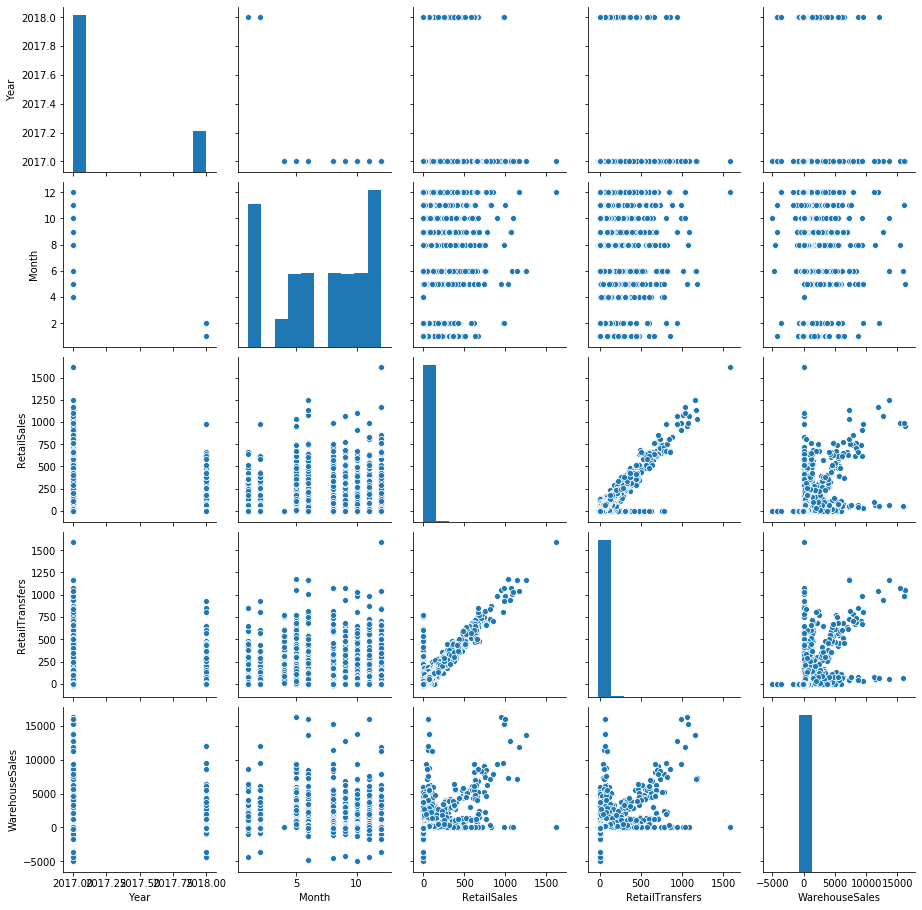

In [288]:
sns.pairplot(data._get_numeric_data())